In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv(r"C:\Users\shrad\Downloads\forestfires (2).csv")
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

In [5]:
# Dropping column which are not required
data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthapr','monthaug','monthmay','monthsep','monthoct','monthnov','monthdec'],axis = 1)
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3           small  
4           small  
..            ...  
512         large  
513         large  
514         large  
515         small  
516         small  

[517 rows x 12 columns]

In [6]:
#Checking how much data points have large and small area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

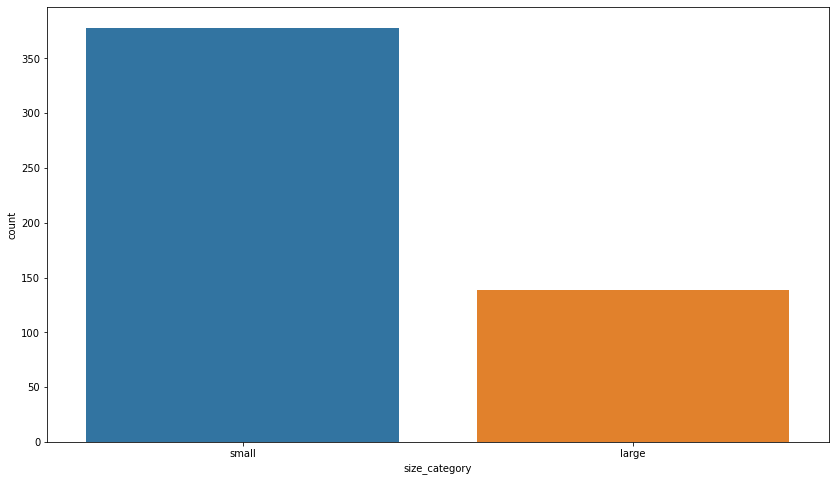

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(14,8))
sns.countplot(x= 'size_category',data= data)
plt.show()

In [8]:
#Checking for which value of area is categorised into large and small by creating
pd.crosstab(data.area, data.size_category)

size_category  large  small
area                       
0.00               0    247
0.09               0      1
0.17               0      1
0.21               0      1
0.24               0      1
...              ...    ...
200.94             1      0
212.88             1      0
278.53             1      0
746.28             1      0
1090.84            1      0

[251 rows x 2 columns]

In [9]:
data.corr()

FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rain  1.000000 -0.007366  
area -0.007366  1.000000

In [10]:
# Encoding categorical data of month and day feature
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

In [11]:
# Encoding target variable 'size category'
data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0        3    5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1       10    2  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2       10    6  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3        3    5  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4        3    7  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512      8    7  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513      8    7  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514      8    7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516     11    2  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     size_category  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
512              1  
513              1  
514              1  
515              0  
516              0  

[517 rows x 12 columns]

In [12]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,data['size_category'],random_state=1) 

In [13]:
x_train

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain    area  \
300      6    1  90.4   93.3  298.1   7.5  20.7  25   4.9   0.0    0.00   
514      8    7  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0   11.16   
355      9    5  92.1   99.0  745.3   9.6  20.8  35   4.9   0.0   13.06   
80       8    7  91.4  142.4  601.4  10.6  19.5  39   6.3   0.0    0.00   
46       9    1  90.9  126.5  686.5   7.0  14.7  70   3.6   0.0    0.00   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...     ...   
129     10    7  92.6   46.5  691.8   8.8  15.4  35   0.9   0.0    0.00   
144      8    3  95.5   99.9  513.3  13.2  23.8  32   5.4   0.0    0.77   
72       3    5  91.7   33.3   77.5   9.0  15.6  25   6.3   0.0    0.00   
235      8    7  91.4  142.4  601.4  10.6  19.6  41   5.8   0.0  196.48   
37      10    5  90.0   41.5  682.6   8.7  11.3  60   5.4   0.0    0.00   

     size_category  
300              0  
514              1  
355              1  
80               0  
46               0  
..             ...  
129              0  
144              0  
72               0  
235              1  
37               0  

[387 rows x 12 columns]

In [14]:
x_test

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
270      8    2  92.1  152.6  658.2  14.3  21.8  56   3.1   0.0   0.52   
90       8    6  90.2   96.9  624.2   8.9  14.7  59   5.8   0.0   0.00   
133      9    4  93.7   80.9  685.2  17.9  17.6  42   3.1   0.0   0.00   
221      9    5  93.3  141.2  713.9  13.9  18.6  49   3.6   0.0  35.88   
224      9    3  90.1   82.9  735.7   6.2  15.4  57   4.5   0.0  37.71   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
18       3    3  89.2   27.9   70.8   6.3  15.9  35   4.0   0.0   0.00   
40       7    2  79.5   60.6  366.7   1.5  23.3  37   3.1   0.0   0.00   
273     12    7  84.4   27.2  353.5   6.8   4.8  57   8.5   0.0   8.98   
503      8    3  94.5  139.4  689.1  20.0  29.2  30   4.9   0.0   1.95   
500      8    2  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8   0.00   

     size_category  
270              0  
90               0  
133              0  
221              1  
224              1  
..             ...  
18               0  
40               0  
273              1  
503              0  
500              0  

[130 rows x 12 columns]

In [15]:
y_train

300    0
514    1
355    1
80     0
46     0
      ..
129    0
144    0
72     0
235    1
37     0
Name: size_category, Length: 387, dtype: int64

In [16]:
y_test

270    0
90     0
133    0
221    1
224    1
      ..
18     0
40     0
273    1
503    0
500    0
Name: size_category, Length: 130, dtype: int64

In [17]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [20]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7365721997300945)

In [21]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 74.61538461538461


array([[97,  0],
       [33,  0]], dtype=int64)